In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [53]:
df=pd.read_csv('national co2 emission.csv')
df.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,2020,AFGHANISTAN,3236,1201.0,1985.0,42.0,8.0,NaN,0.084441,10.0
1,2020,ALBANIA,1294,155.0,826.0,28.0,285.0,NaN,0.450400,40.0
2,2020,ALGERIA,43211,137.0,14912.0,24091.0,2396.0,1675.0,1.002778,259.0
3,2020,ANDORRA,102,0.0,102.0,NaN,NaN,NaN,1.326207,0.0
4,2020,ANGOLA,4810,NaN,2652.0,679.0,304.0,1176.0,0.146204,221.0


In [54]:
df

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,2020,AFGHANISTAN,3236,1201.0,1985.0,42.0,8.0,NaN,0.084441,10.0
1,2020,ALBANIA,1294,155.0,826.0,28.0,285.0,NaN,0.450400,40.0
2,2020,ALGERIA,43211,137.0,14912.0,24091.0,2396.0,1675.0,1.002778,259.0
3,2020,ANDORRA,102,0.0,102.0,NaN,NaN,NaN,1.326207,0.0
4,2020,ANGOLA,4810,NaN,2652.0,679.0,304.0,1176.0,0.146204,221.0
...,...,...,...,...,...,...,...,...,...,...
18764,1755,UNITED KINGDOM,2555,2555.0,0.0,0.0,0.0,NaN,NaN,0.0
18765,1754,UNITED KINGDOM,2554,2554.0,0.0,0.0,0.0,NaN,NaN,0.0
18766,1753,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
18767,1752,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0


In [55]:
df.isnull().sum()

,0
Year,0
Country,0
Total,0
Solid Fuel,5691
Liquid Fuel,619
Gas Fuel,8158
Cement,517
Gas Flaring,16093
Per Capita,5524
Bunker fuels (Not in Total),289


In [56]:
df.drop(columns='Gas Flaring', inplace=True, axis=1)

In [57]:
columns_to_fill = ['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Bunker fuels (Not in Total)', 'Per Capita']

for col in columns_to_fill:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

display(df.isnull().sum())

/tmp/ipython-input-57-3538527316.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


,0
Year,0
Country,0
Total,0
Solid Fuel,0
Liquid Fuel,0
Gas Fuel,0
Cement,0
Per Capita,0
Bunker fuels (Not in Total),0


In [58]:
df.head(1)

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Per Capita,Bunker fuels (Not in Total)
0,2020,AFGHANISTAN,3236,1201.0,1985.0,42.0,8.0,0.084441,10.0


In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Country' column
df['Country'] = label_encoder.fit_transform(df['Country'])

# Display the first few rows with the new encoded column
display(df.head())

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Per Capita,Bunker fuels (Not in Total)
0,2020,0,3236,1201.000000,1985.0,42.000000,8.000000,0.084441,10.0
1,2020,1,1294,155.000000,826.0,28.000000,285.000000,0.450400,40.0
2,2020,2,43211,137.000000,14912.0,24091.000000,2396.000000,1.002778,259.0
3,2020,3,102,0.000000,102.0,6310.863821,641.250548,1.326207,0.0
4,2020,4,4810,16404.913519,2652.0,679.000000,304.000000,0.146204,221.0


In [60]:
float_to_convert=['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Bunker fuels (Not in Total)']
for col in float_to_convert:
    df[col]=df[col].astype(int)

display(df.dtypes)

,0
Year,int64
Country,int64
Total,int64
Solid Fuel,int64
Liquid Fuel,int64
Gas Fuel,int64
Cement,int64
Per Capita,float64
Bunker fuels (Not in Total),int64


In [61]:
X=df.drop(columns='Year')
y=df['Year']

In [62]:
X

,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Per Capita,Bunker fuels (Not in Total)
0,0,3236,1201,1985,42,8,0.084441,10
1,1,1294,155,826,28,285,0.450400,40
2,2,43211,137,14912,24091,2396,1.002778,259
3,3,102,0,102,6310,641,1.326207,0
4,4,4810,16404,2652,679,304,0.146204,221
...,...,...,...,...,...,...,...,...
18764,242,2555,2555,0,0,0,1.159232,0
18765,242,2554,2554,0,0,0,1.159232,0
18766,242,2553,2553,0,0,0,1.159232,0
18767,242,2553,2553,0,0,0,1.159232,0


In [63]:
y

,Year
0,2020
1,2020
2,2020
3,2020
4,2020
...,...
18764,1755
18765,1754
18766,1753
18767,1752


In [64]:
#splitting the dataset into training set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [66]:
X_train.shape

(15015, 8)

In [67]:
X_test.shape

(3754, 8)

In [68]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
ac= (r2_score(y_test,y_pred))
ac

0.16824748232630904

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print(r2_score(y_test, y_pred))

0.9766415846711778


In [70]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
print(r2_score(y_test, xgb.predict(X_test)))

0.9684878587722778


### Linear Regression assumes a straight-line relationship between features and Per Capita. If the true relationship is non-linear (e.g., exponential), the model will fail.

---


### Therefore, we use non-linear models such as Random forest regressor and xgboost to better analyse the data

In [71]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (15015, 8)
X_test shape: (3754, 8)


In [72]:
## Not optimized yet !!!
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Mean:", scores.mean())

Mean: -7.9547337544353365


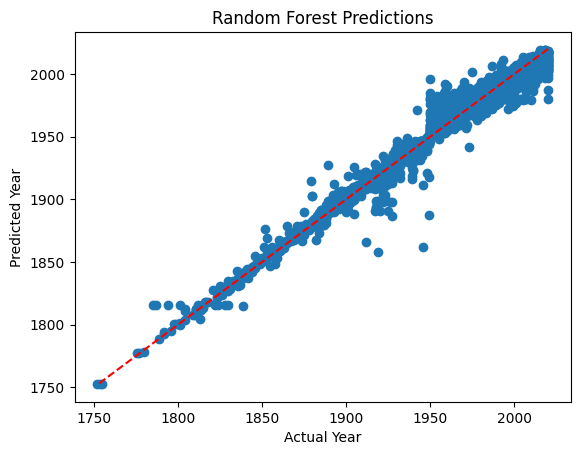

In [73]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.max(), y_test.min()], [y_test.max(), y_test.min()], 'r--')
plt.xlabel("Actual Year")
plt.ylabel("Predicted Year")
plt.title("Random Forest Predictions")
plt.show()

In [74]:
# Get top 5 most important features
rf.fit(X_train, y_train)
importance = rf.feature_importances_
top_features = X.columns[np.argsort(importance)[-5:]]
X_reduced = X[top_features]
#scores = cross_val_score(rf, X_reduced, y, cv=5, scoring='r2')

In [75]:
top_features

Index(['Per Capita', 'Bunker fuels (Not in Total)', 'Cement', 'Country',
       'Gas Fuel'],
      dtype='object')

In [76]:
X_reduced

,Per Capita,Bunker fuels (Not in Total),Cement,Country,Gas Fuel
0,0.084441,10,8,0,42
1,0.450400,40,285,1,28
2,1.002778,259,2396,2,24091
3,1.326207,0,641,3,6310
4,0.146204,221,304,4,679
...,...,...,...,...,...
18764,1.159232,0,0,242,0
18765,1.159232,0,0,242,0
18766,1.159232,0,0,242,0
18767,1.159232,0,0,242,0


In [77]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 6.669485984649876


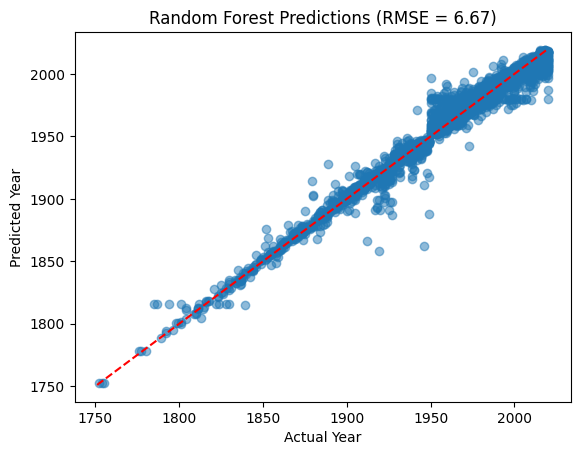

In [78]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Year")
plt.ylabel("Predicted Year")
plt.title(f"Random Forest Predictions (RMSE = {rmse:.2f})")
plt.show()

## Diagnostic Steps to Validate Performance

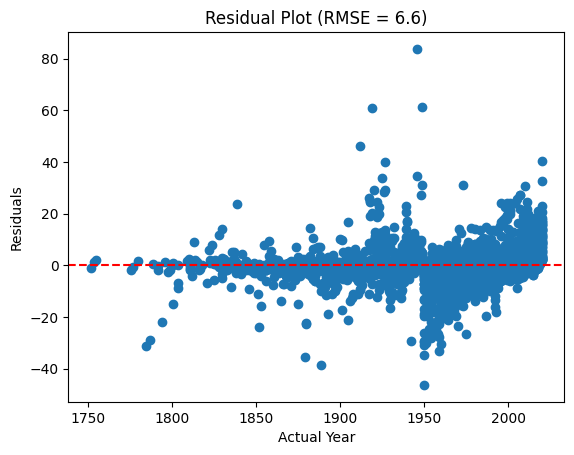

In [79]:
## Plot residuals (actual – predicted) to identify patterns:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Year")
plt.ylabel("Residuals")
plt.title("Residual Plot (RMSE = 6.6)")
plt.show()

In [80]:
## Calculate the coefficient of determination to see how much variance your model explains:
# R² close to 1.0 (e.g., > 0.9) -→ Excellent fit.
# R² ~ 0.6–0.8 -→ Decent, but room for improvement.
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")

R² Score: 0.977


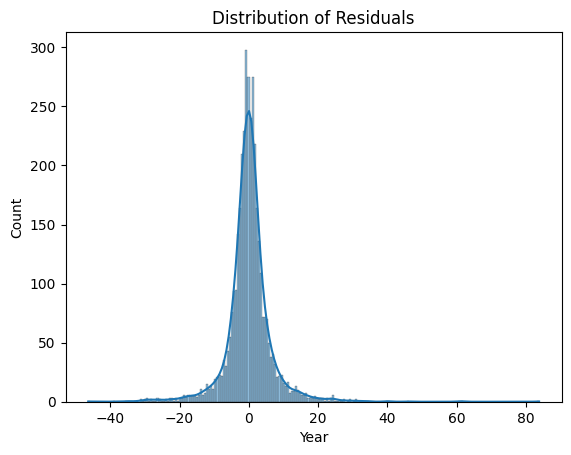

In [81]:
## Check if errors are normally distributed:
# Ideal: Symmetric bell curve centered at 0.
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

## Using ANN for our Regression model

In [121]:
## Create the ANN now
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [122]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256

# Creating model using the Sequential in tensorflow
model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [123]:
# loss function
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=0.01),
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 5.3928 - mean_squared_logarithmic_error: 5.3928 - val_loss: 0.0204 - val_mean_squared_logarithmic_error: 0.0204
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0213 - mean_squared_logarithmic_error: 0.0213 - val_loss: 0.0100 - val_mean_squared_logarithmic_error: 0.0100
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0126 - mean_squared_logarithmic_error: 0.0126 - val_loss: 0.0046 - val_mean_squared_logarithmic_error: 0.0046
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - mean_squared_logarithmic_error: 0.0086 - val_loss: 0.0032 - val_mean_squared_logarithmic_error: 0.0032
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081 - mean_squared_logarithmic_error: 0.0081 - val_loss: 0.0028 - val_mean_squared_logarithmic_error: 0.0028
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0071 - mean_squared_logarithmic_error: 0.0071 - val_loss: 0.0043 - val_mean_s

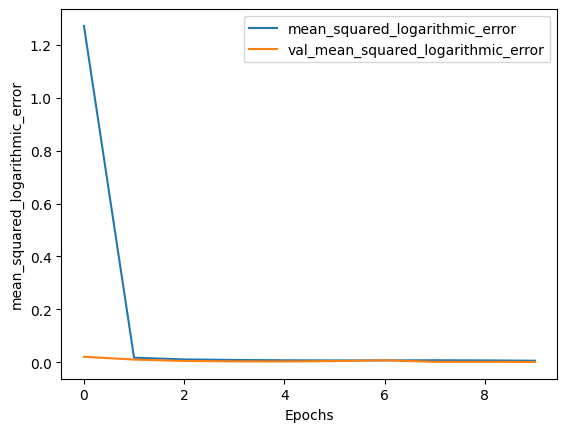

In [124]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')